In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import corner
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit

In [2]:
from torsionfit.toy_model import ToyModel

Generate toy model that allows continuous phase proposals between 0 and 180

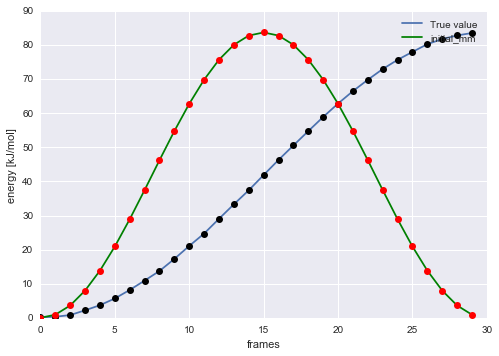

In [3]:
toy = ToyModel(true_value=DihedralType(10, 1, 180, 1, 1), initial_value=DihedralType(10, 2, 180, 1, 1), n_increments=30, continuous=True)
plt.plot(toy.synthetic_energy, label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

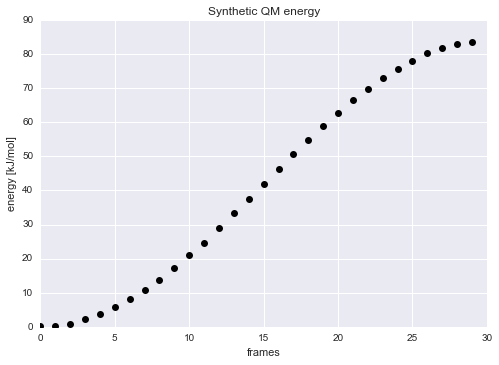

In [4]:
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.title('Synthetic QM energy')
plt.savefig('toy_QM_energy.pdf')

In [5]:
# sample
sampler = MCMC(toy.model.pymc_parameters)
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10001 of 10000 complete in 326.6 sec

In [6]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)
print toy.model.pymc_parameters['CG331_CG321_CG321_CG331_1_K'].value

true value
<DihedralTypes [<DihedralType; phi_k=10.000, per=1, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralType; phi_k=0.000, per=2, phase=14.638,  scee=1.000, scnb=1.000>
9.99443039693


With continuous phase proposals torsionfit gives a good fit. 

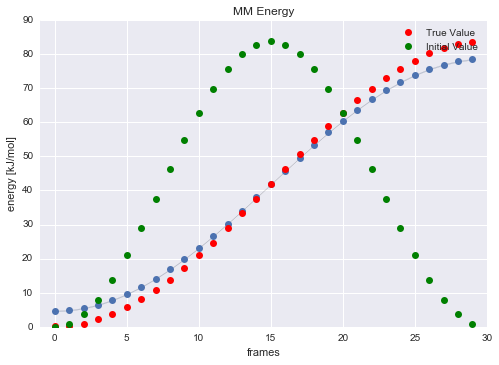

In [7]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, 'o', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, 'o', color='g', label='Initial Value')
plt.legend()
plt.savefig('toy_mm_energy_continous.pdf')

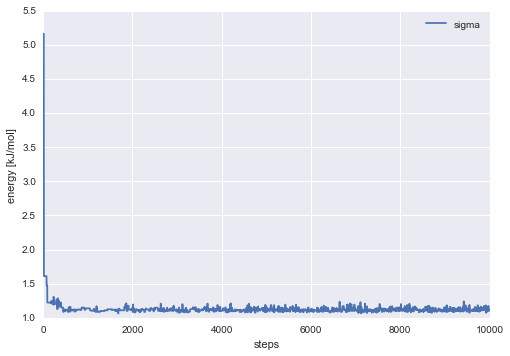

In [30]:
plt.plot(np.exp(sampler.trace('sigma')[9:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_continous.pdf')

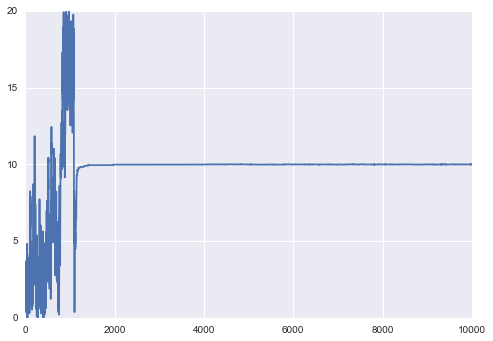

In [15]:
plt.plot(sampler.trace('CG331_CG321_CG321_CG331_1_K')[:])

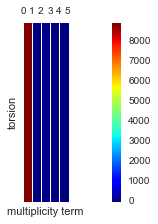

In [13]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')
plt.savefig('multiplicity_continous.pdf')

In [9]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)

true value
<DihedralTypes [<DihedralType; phi_k=6.899, per=2, phase=0.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralTypes [<DihedralType; phi_k=13.259, per=1, phase=0.000,  scee=1.000, scnb=1.000>]>


From the traces of each parameters, you can see how the phase slowly moves to 180 as multiplicity 1 truns on and 2 turns off 

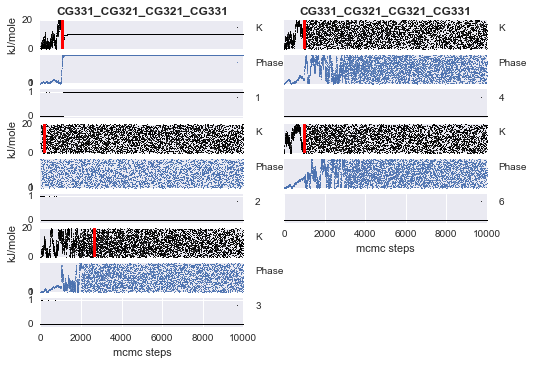

In [14]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler, markersize=2.0)

Generate new toy model which only allows discrete phase angles at 0 and 180. Nothing in between

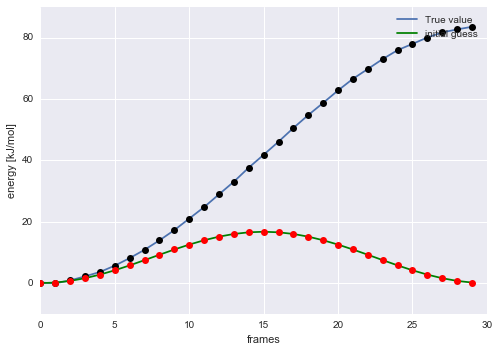

In [16]:
toy2 = ToyModel(true_value=DihedralType(10, 1, 180, 1, 1), initial_value=DihedralType(2, 2, 180, 1, 1), n_increments=30)
#toy = ToyModel(n_increments=50, decouple_n=True)
#toy.scan_set.save_initial_mm(toy._param)
plt.plot(toy2.synthetic_energy, label='True value')
plt.plot(toy2.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy2.scan_set.mm_energy, color='g', label = 'initial guess')
plt.plot(toy2.scan_set.initial_mm, 'ko', color='r')
plt.legend()

In [21]:
# sample
sampler2 = MCMC(toy2.model.pymc_parameters)
sampler2.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 478.8 sec

The rejection rate is very high and the sampler gets stuck as can be seen in the parameter traces. The fit is not good. 

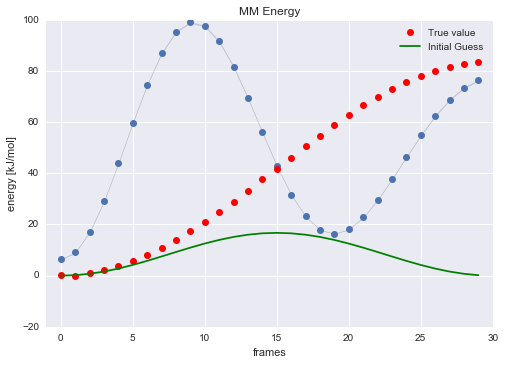

In [22]:
seaborn.tsplot(sampler2.trace('mm_energy')[:], interpolate=False)
plt.plot(toy2.synthetic_energy, 'o', color='r', label='True value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy2.scan_set.initial_mm, color='g', label='Initial Guess')
plt.legend()
plt.savefig('toy_mm_energy_fixed.pdf')

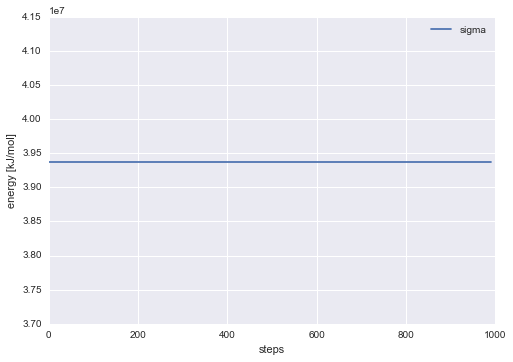

In [24]:
plt.plot(np.exp(sampler2.trace('sigma')[9:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')

import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')

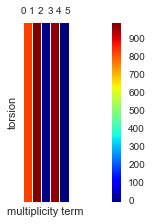

In [19]:
import torsionfit.plots as plots 
plots.marg_mult(toy2.model, sampler2, 10000, 0, 'random.png')

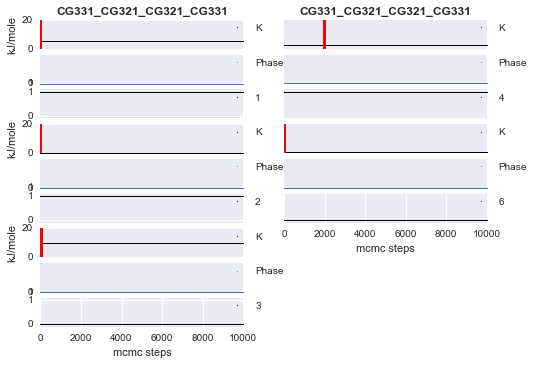

In [23]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler2, markersize=2.0)

In [32]:
toy3 = ToyModel(true_value=DihedralType(10, 2, 180, 1, 1), initial_value=DihedralType(2, 2, 180, 1, 1), n_increments=30, continuous=True)
toy4 = ToyModel(true_value=DihedralType(10, 2, 0.0, 1, 1), initial_value=DihedralType(2, 2, 180, 1, 1), n_increments=30, continuous=True)

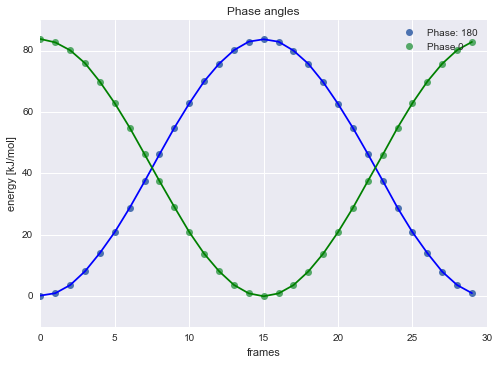

In [23]:
plt.plot(toy3.synthetic_energy,'o', label='Phase: 180')
plt.plot(toy3.synthetic_energy, color='b')
plt.plot(toy4.synthetic_energy, 'o', label='Phase 0')
plt.plot(toy4.synthetic_energy, color='g')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.legend()
plt.title('Phase angles')
plt.savefig('phase_angle.pdf')